## Rotorcraft pitch response for different rotor hinge spring constants  with no flap dynamics
**Source: Prof. Marilena Pavel**

In the following tutorial we will compute the pitch reponse for a rotorcraft considering the rotor hinge spring constant. If you're unsure what a certain variable means at anytime, please find the nomeclature below. Before we perform the simulation a small recap of the pitch equation of motion is shown below. The basic equation of motion for angular acceleration is as follows:

$$
\Sigma M = I_g \alpha
$$

In order to apply this to helicopter the basic equation of motion in the pitch plane can be described as shown below. 

$$
\begin{equation}
\tag{1}
M_y  = I_y \frac{dq}{dt} = I_y \dot{q}
\end{equation}
$$

Then using the expression for $M_y$ as shown in equation 2\*\* which is derived from [Figure 1](#figure1) (lecture slide 15). 

$$
\begin{equation}
\large
\tag{2**}
M_y  = T sin(\theta_c - a_1)\cdot h - \frac{N}{2}(\theta_c - a_1)K_{\beta}
\end{equation}
$$

<br>
<p align="center"  id="figure1">
<img src="https://github.com/saullocastro/tuduam/blob/main/notebooks/static/pitch_EOM_heli.png?raw=true" width="400" /> 
 <br>
<em>Figure 1: Free body diagram of a pitching helicopter</em>
</p>
<br>


We can  then rewrite equation 1 to the form shown in equation 3\* by substituting equation 2\*\*.

$$
\begin{equation}
\tag{3*}
\begin{split}
\dot{q} & = -\frac{T}{I_y} h sin(\theta_c - a_1)  - \frac{N}{2 I_y} K_{\beta} (\theta_c - a_1) \\
& \text{Then using the linearization } sin(\theta_c - a_1) \approx (\theta_c - a_1) \text{ we can write:} \\
\dot{q} & = \frac{Th + (N/2)K_{\beta}}{I_y} \cdot (\theta_c - a_1) \\
\dot{q} & = K`  (\theta_c - a_1) \\
\end{split}
\end{equation}
$$

This equation will be used to derive a solution to the pitch motion of the aircraft over time in the proceeding sections.

## Nomenclature

$q$ = $\frac{d \theta}{dt}$ =  pitch rate  
$\dot{q}$ = $\frac{d^2 \theta}{dt^2}$ =  pitch acceleration 
$T$ =  Thrust in Newtons
$h$ =  Distance between the CG and the line of action of the x-component of the thrust.  
$K_{\beta}$ =  Rotor spring constant in Newton-meters  
$N$ = Number of blades  
$\theta_c$ = Cyclic input from the pilot in radians    
$a_1$ =  Rotor flap in radians, approximated by $-\frac{16}{\gamma}\frac{q}{\Omega}$    
$\gamma$ =  Lock number, the ratio of aerodynamics forces to inertial forces  
$K`$ =   See equation 3\*





### Introduce relevant constants and import the relevant libraries

In order to perform the dynamic analysis we must first set the physical properties of the aircraft. The relevant parameters are shown hereunder. Please see the comments in the code and the nomenclature for furhter explanation on what the paremeters are and their units.



In [1]:
import numpy as np
import matplotlib.pyplot as plt


lok = 6  # Lock number (-)
mass = 2200  # Rotorcraft mass (kg)
vtip = 200  # Rotor tip speed (m/sec)
rotor_radius= 7.32  # Rotor radius (m)
iy = 10625  # Rotorcraft mass moment of inertia (kgm^2)
h = 1  # Distance from vehicle CG to rotor hub
kbeta = 46000  # Rotor hinge spring hingeless (Nm)
kbeta0 = 0  # Rotor hinge spring teetering (Nm)
omega= vtip / rotor_radius
input_cyc = -1 * np.pi / 180  # Pilot cyclic control (1 deg/sec)
N = 3  # Number of blades

thiy_init = (mass * 9.81 * h + N / 2 * kbeta) / iy
thiy0 = (mass * 9.81 * h +N / 2 * kbeta0) / iy

print(f"Rpm =  {np.round(omega/(2*np.pi)*60, 2)}")
print(f"K` with rotor spring modelling =  {np.round(thiy_init,2)} [rad/s^2]")
print(f"K` without rotor spring modelling =  {np.round(thiy0, 2)} [rad/s^2]")


Rpm =  260.91
K` with rotor spring modelling =  8.53 [rad/s^2]
K` without rotor spring modelling =  2.03 [rad/s^2]


## Transient response 

On slide 17 of the lecture slides the first order differential equation is solved to find a solution to equation 3\*. The result is repeated below in equation 8\*:

<br>

$$
\begin{equation}
\Large
\tag{8*}
q(t) = - \theta_c \Omega \frac{\gamma}{16}\left[1 - e^{-\frac{16}{\gamma \Omega} K`t}\right]
\end{equation}
$$

Using this explicit solution of the differential equation we can easily find the response. This is implemented in the snippet of Python code below, the code leverages the broadcasting feature of NumPy to avoid for loops. To see the effects of different spring constants a slider is available to see the change in the response. Another value you can change is the Lock number.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets

# Starting integration for the pitch equation of motion
t_end = 10  # Time (sec)
step = 0.001  # Time step (sec)
t_arr = np.arange(0, t_end, step)

def plot_transient(kbeta, lok):

    thiy_updated = (mass * 9.81 * h + N / 2 * kbeta) / iy
    q = -input_cyc * omega * lok / 16 * (1 - np.exp(-16 / (lok * omega) * thiy_updated * t_arr))
    q0 = -input_cyc * omega * lok / 16 * (1 - np.exp(-16 / (lok * omega) * thiy0 * t_arr))

    # Plot the results for the first 100 time steps
    plt.cla()
    plt.plot(t_arr, np.degrees(q), label=r'Rotorcraft $K_{\beta}$' + f"= {kbeta} Nm")
    plt.plot(t_arr, np.degrees(q0), label=r'Rotorcraft $K_{\beta}$ = 0')
    plt.xlabel('Time (sec)')
    plt.ylabel('q (deg/sec)')
    plt.legend()
    plt.grid()
    res = plt.show()

# Creating an interactive slider
res= interact(plot_transient, kbeta=widgets.IntSlider(min=0, max=2e5, step=1e3, value=kbeta), 
         lok=widgets.IntSlider(min=1, max=10, step=1, value=lok))


interactive(children=(IntSlider(value=46000, description='kbeta', max=200000, step=1000), IntSlider(value=6, d…

In [3]:
from google.colab import output
output.enable_custom_widget_manager()

ModuleNotFoundError: No module named 'google'

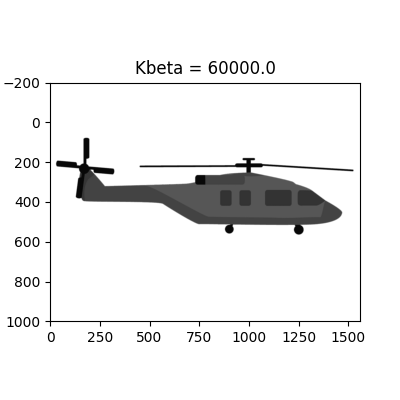

In [6]:
%matplotlib ipympl
from scipy.interpolate import CubicSpline
from scipy.integrate import cumulative_trapezoid
from matplotlib.animation import FuncAnimation
from PIL import Image
import os
import time

# Collects any previous animation which might interfere
try:
    ani.event_source.stop()
except:
    pass

#============== Change K_beta to see the effects =================================
kbeta = 6e4
#========================================================================

t_end = 8  # Time (sec)
step = 0.001  # Time step (sec)
t_arr = np.arange(0, t_end, step)
helicopter_img = Image.open(os.path.abspath(os.path.join('.', 'static','helicopter2.png')))
# larger_canvas = Image.new("RGBA", (600, 600), (0, 0, 0, 0))

#------------ Create data ----------------------------------------------------------------
thiy_updated = (mass * 9.81 * h + N / 2 * kbeta) / iy
q = -input_cyc * omega * lok / 16 * (1 - np.exp(-16 / (lok * omega) * thiy_updated * t_arr))
theta = cumulative_trapezoid(q, t_arr, initial=0)
spline = CubicSpline(t_arr, theta)
#----------------------------------------------------------------------------------------------

plt.close()
plt.clf()
plt.cla()
fig, ax = plt.subplots(figsize=(4,4))
plt.title(f"Kbeta = {kbeta}")
plt.ylim(1000,-200)
# ax.imshow(larger_canvas)
img_display = ax.imshow(helicopter_img)  # Create initial image plot

def get_pitch(time):
    return spline(time)

def update(frame):
    pitch_angle = get_pitch(frame)  # Calculate pitch angle
    rotated_img = helicopter_img.rotate(np.degrees(pitch_angle))  # Rotate the image
    img_display.set_data(rotated_img)  # Update the image data
    return (img_display,)  # Return a tuple of the artists that have been updated

time_step = 0.3
frame_interval = 300  # Milliseconds between frames

ani = FuncAnimation(fig, update, frames=np.arange(0, t_end, time_step), interval=frame_interval,blit=True, repeat=False)
plt.show()


In [ ]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'r-')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()


## Bonus: How to avoid the linearization?

Remember when we used $sin(\theta_C - a_1) \approx (\theta_C - a_1)$ to derive equation 3\*? This simplified the equation allowing us to write an explict solution to the pitch motion over time as in equation 8\*. If a higher accuracy is required we can solve equation 3\* numerically however using python.

Below you can try to implement it yourself. The basic structure has already been laid out but the two most important expressions are still missing. Have fun! 

In [ ]:
def plot_nonlinear(kbeta, lok):
    # Set initial variables
    t = 0
    dt = 1e-3
    q = 0
    q0 = 0
    t_lst = [t]
    q_lst = [q]
    q0_lst = [q0]

    while t < 10:
        # All your code should go between the two lines, any unfinished statement
        # should be atleast filled in. Ellipsis is a place holder, please replace with the  correct expression
        #=================================================================
        dq =  Ellipsis 
        dq0 = Ellipsis
        #=================================================================

        q += dq #
        q0 += dq0 # 
        t += dt

        t_lst.append(t)
        q_lst.append(q)
        q0_lst.append(q0)

    # Plot the results for the first 100 time steps
    plt.plot(t_lst, np.degrees(q_lst), label=r'Rotorcraft $K_{\beta}$' + f"= {kbeta} Nm")
    plt.plot(t_lst, np.degrees(q0_lst), label=r'Rotorcraft $K_{\beta}$ = 0')
    plt.xlabel('Time (sec)')
    plt.ylabel('q (deg/sec)')
    plt.legend()
    plt.grid()
    plt.show()

# Creating an interactive slider
res = interact(plot_nonlinear, kbeta=widgets.IntSlider(min=0, max=2e5, step=1e3, value=kbeta), 
         lok=widgets.IntSlider(min=1, max=10, step=0.1, value=lok))